In [9]:
import random
import pandas as pd
import numpy as np

In [10]:
A = np.array([[1, 1], [0, 1]])
B = np.array([[1, -1], [0, 1]])
C = np.array([[1, 0], [1, 1]])
D = np.array([[1, 0], [-1, 1]])

In [11]:
first_digit = str(random.randint(1, 4))

cur_digit = first_digit

all_digits = cur_digit

# generate a sequence of 30 integers, with the restriction that we cannot follow 1 with 2, cannot follow 2 with 1,
# cannot follow 3 with 4, and cannot follow 4 with 3. 
# This is because we want to ensure that we are not teaching the model to predict the wrong path back to the origin
# if we multiply a matrix by C then D, it is the same as multiplying by the identity
for _ in range(1, 30):

    # adapted from ChatGPT
    if cur_digit=="1":
        cur_digit = str(random.choice([1, 3, 4]))
    
    elif cur_digit=="2":
        cur_digit = str(random.randint(1, 3) + 1)

    elif cur_digit=="3":
        cur_digit = str(random.randint(1, 3))

    elif cur_digit=="4":
        cur_digit = str(random.choice([1, 2, 4]))


    all_digits = all_digits + cur_digit


In [12]:
cur_array = np.array([0, 1])

for i in all_digits: 
    if i=="1":
        cur_array = cur_array @ A
    elif i=="2":
        cur_array = cur_array @ B
    elif i=="3":
        cur_array = cur_array @ C
    elif i=="4":
        cur_array = cur_array @ D

In [13]:
cur_array

# I think this is likely doomed to failure when training the NN because even though we're training it to predict the most recent move, there may be a different path that more effectively gets to this location
# for instance, one path to the [103, 396] that was generated as one example goes through some negative numbers (like [-9, -7]) but I think it would be more efficient to just stay in the positives

# I think reinforcement learning is a better option here. 

# could add more than just the most recent to the list of all the data points because we've ensured that at no point are we effectively multiplying by the identity

array([-26,   7])

In [14]:
data = {
    'val1': [],
    'val2': [],
    'last_matrix': []
}

test_df = pd.DataFrame(data)

In [17]:
for _ in range(1, 10000):

    start_array = np.array([0, 1])
    all_digits = ""
    for d in range(1, 30):

        # adapted from ChatGPT
        if cur_digit=="1":
            cur_digit = str(random.choice([1, 3, 4]))
        elif cur_digit=="2":
            cur_digit = str(random.randint(1, 3) + 1)
        elif cur_digit=="3":
            cur_digit = str(random.randint(1, 3))
        elif cur_digit=="4":
            cur_digit = str(random.choice([1, 2, 4]))
        all_digits = all_digits + cur_digit

    # # adapted from ChatGPT
    # as_str = np.array2string(x, separator="")
    # remove_undesired = as_str.strip("[")
    # remove_undesired = remove_undesired.strip("]")

    # # if there are multiple 0's in a row, replace them with just one 0
    # remove_undesired = re.sub("0(0)+", "0", remove_undesired)

    remove_undesired = all_digits

    cur_array = start_array
    for i in remove_undesired:
        if i=="1":
            cur_array = cur_array @ A
        elif i=="2":
            cur_array = cur_array @ B
        elif i=="3":
            cur_array = cur_array @ C
        elif i=="4":
            cur_array = cur_array @ D

    # adapted from https://stackoverflow.com/questions/24284342/insert-a-row-to-pandas-dataframe

    df2 = pd.DataFrame([[cur_array[0], cur_array[1], remove_undesired[-1]]], columns=['val1', 'val2', 'last_matrix'])
    test_df = pd.concat([df2, test_df])

In [22]:
import matplotlib.pyplot as plt

In [26]:
# adapted from ChatGPT

test_df['last_matrix'] = test_df['last_matrix'].astype(int)

In [37]:
test_df0 = test_df[test_df['last_matrix'] == 4]
test_df1 = test_df[test_df['last_matrix'] == 1]
test_df2 = test_df[test_df['last_matrix'] == 2]
test_df3 = test_df[test_df['last_matrix'] == 3]

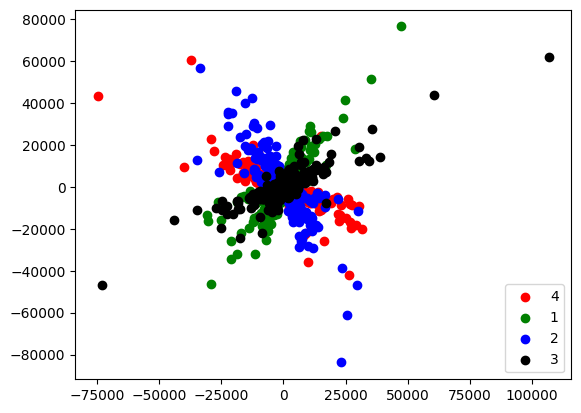

In [44]:
plt.scatter(x=test_df0['val1'], y=test_df0['val2'], c="red")
plt.scatter(x=test_df1['val1'], y=test_df1['val2'], c="green")
plt.scatter(x=test_df2['val1'], y=test_df2['val2'], c="blue")
plt.scatter(x=test_df3['val1'], y=test_df3['val2'], c="black")


# adapted from https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
plt.legend([4, 1, 2, 3])

plt.show()

In [21]:
test_df.to_csv('four_directions.csv', index=False)